In [3]:
# imports
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.simplefilter('ignore') # ignore warningfs
%matplotlib inline

In [4]:
df = pd.read_csv('../data/raw/daily-minimum-temperatures-in-me.csv'
                ,skiprows=1
                ,usecols=[1]
                ,names=['Temp']
                ,dtype=np.float
                ,sep=','
)

In [5]:
df.describe()

,Temp
count,3649.000000
mean,11.175144
std,4.069341
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


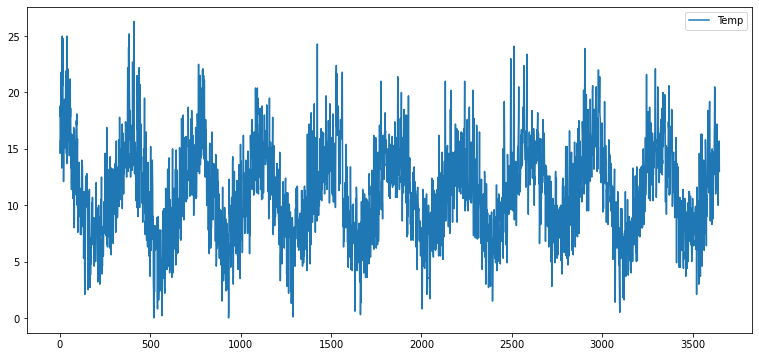

In [9]:
# distribution is consistent
df.plot(figsize=(13,6))

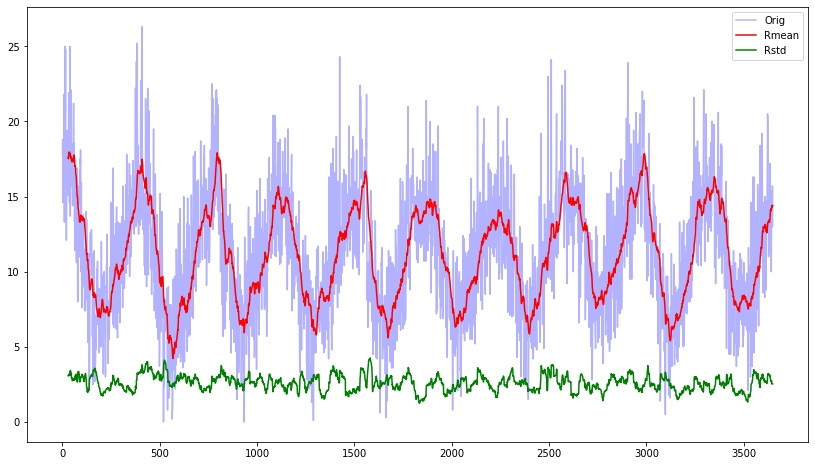

In [10]:
# let's look at the rolling mean and standard deviation to assess if it is consistent
role_mean = df.rolling(window=30,center=False).mean()
role_std = df.rolling(window=30, center=False).std()

fig = plt.figure(figsize=(14,8))

orig = plt.plot(df,color='blue',alpha=.3,label='Orig')
mean = plt.plot(role_mean,color='red',label='Rmean')
std = plt.plot(role_std,color='green',label='Rstd')

plt.legend(loc='best')
plt.show()

In [6]:
# just want the values to input into sm
temp = df.values

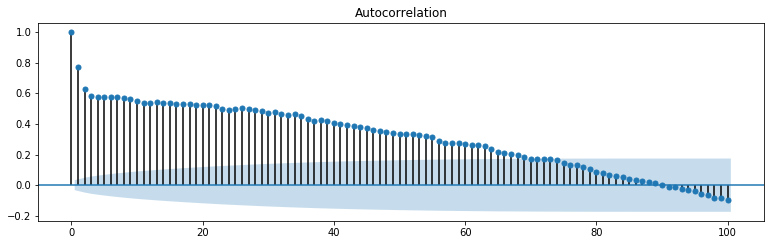

In [7]:
# acf plot to assess autocorrelation
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(temp,lags=100,ax=ax)

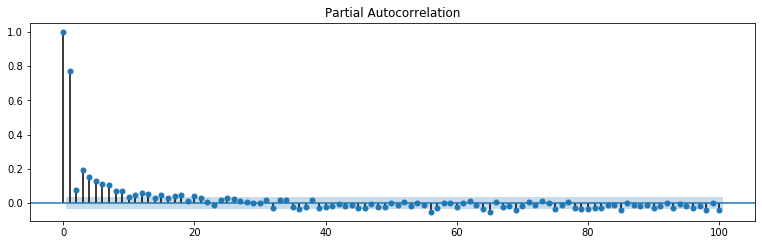

In [8]:
# pacf plot to assess partial autocorrelation
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_pacf(temp,lags=100,ax=ax)

In [9]:
# assess which lag period is the best
model2 = sm.tsa.ARMA(temp,(2,0)).fit(disp=False)
model3 = sm.tsa.ARMA(temp,(3,0)).fit(disp=False)
model5 = sm.tsa.ARMA(temp,(5,0)).fit(disp=False)
model7 = sm.tsa.ARMA(temp,(7,0)).fit(disp=False)
model10 = sm.tsa.ARMA(temp,(10,0)).fit(disp=False)

In [10]:
print('lag 2',model2.aic,model2.bic,model2.hqic)
print('lag 3',model3.aic,model3.bic,model3.hqic)
print('lag 5',model5.aic,model5.bic,model5.hqic)
print('lag 7',model7.aic,model7.bic,model7.hqic)
print('lag 10',model10.aic,model10.bic,model10.hqic)

lag 2 17239.651174105697 17264.46000785144 17248.486401621907
lag 3 17106.404961774228 17137.41600395641 17117.44899616949
lag 5 16963.436289039102 17006.851748094155 16978.89793719247
lag 7 16884.285472916374 16940.105348844303 16904.164734827846
lag 10 16846.202383683725 16920.628884920963 16872.708066232357


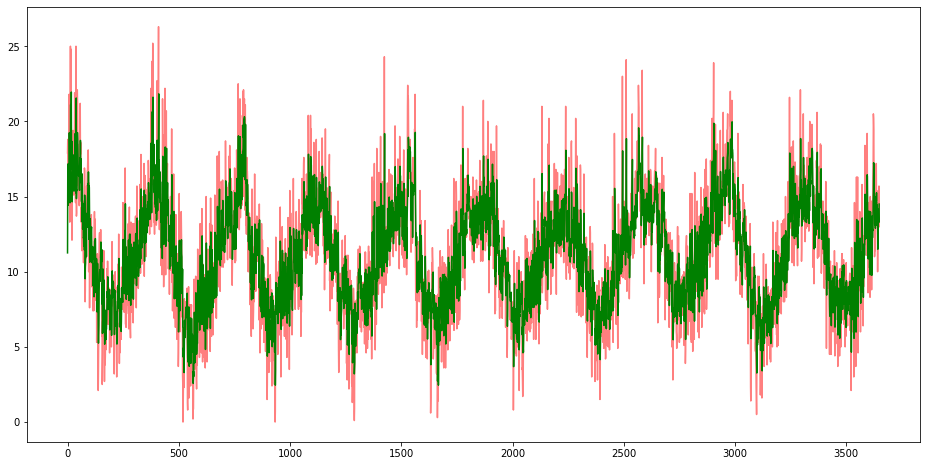

In [17]:
# how close is the model to the actual
fig = plt.figure(figsize=(16,8))

plt.plot(temp,color='red',alpha=.5,label='temp')
plt.plot(model10.fittedvalues,color='green',label='fit')